In [1]:
from seligator.training.trainer import run_training_loop
from seligator.models import baseline
from seligator.evaluate import run_tests


## Baseline

### Training

In [5]:
model, dataset_reader = run_training_loop(
    build_model=baseline.build_model,
    cuda_device=0,
    use_only=baseline.SimpleClassifier.USES
)

Reading data
Building the vocabulary


/home/thibault/dev/est-lascivuum-non-est/env/lib/python3.8/site-packages/allennlp/data/token_indexers/token_characters_indexer.py:55: UserWarning: You are using the default value (0) of `min_padding_length`, which can cause some subtle bugs (more info see https://github.com/allenai/allennlp/issues/1954). Strongly recommend to set a value, usually the maximum size of the convolutional layer size when using CnnEncoder.
  warnings.warn(


building vocab:   0%|          | 0/2034 [00:00<?, ?it/s]

Building the model


You provided a validation dataset but patience was set to None, meaning that early stopping is disabled


Starting training


  0%|          | 0/170 [00:00<?, ?it/s]

/home/thibault/dev/est-lascivuum-non-est/seligator/models/baseline.py:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = torch.nn.functional.softmax(logits)


  0%|          | 0/85 [00:00<?, ?it/s]

Finished training


### Evaluating

Evaluating


0it [00:00, ?it/s]

Encountered the loss key in the model's return dictionary which couldn't be split by the batch size. Key will be ignored.


{'accuracy': 0.7299747048903878, 'precision-negative': 0.7165734767913818, 'precision-positive': 0.7950617074966431, 'recall-negative': 0.9443886280059814, 'recall-positive': 0.36611711978912354, 'fscore-negative': 0.8148576617240906, 'fscore-positive': 0.5013623833656311, 'loss': 0.5505794326179546}
Evaluating: Predicting


/home/thibault/dev/est-lascivuum-non-est/seligator/evaluate.py:75: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  disp.figure_.show()


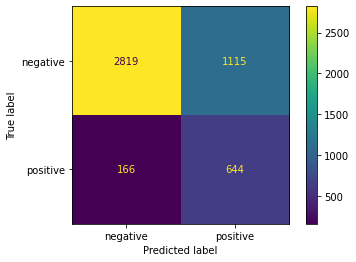

In [3]:
run_tests("dataset/split/test.txt", dataset_reader=dataset_reader, model=model)

In [4]:
del model 